In [1]:
# 上次爬的数据数字和中文混在一起不好处理，重新爬了一次，但是这并不重要，可以直接从读取CSV文件那里看就好。
# 而且网站是实时更新的， 重新跑这段代码写CSV的话下面的图表就不一样了，所以我把读取的CSV文件名字换了一下以免写了新的CSV。
import requests
from bs4 import BeautifulSoup
import csv
hs_unitprice = []
hs_totalprice = []
hs_district = []
hs_size = []

def scrape_one_page(page_url):
    r = requests.get(page_url).text
    data = BeautifulSoup(r,"html.parser")
    
# Unitprice
    up = data.find_all("div",attrs = {"class":"unitPrice"})
    for i in up:
        unitprice = i["data-price"]
        hs_unitprice.append(unitprice)
#===========================================================
# Totalprice
    tp = data.find_all("div",attrs = {"class":"totalPrice"})
    for i in tp:
        data1 = i.find("span")
        totalprice = data1.text
        hs_totalprice.append(totalprice)
#===========================================================
# District
    ad = data.find_all("div",attrs = {"class":"flood"})
    for i in ad:
        data2 = i.find("a")
        district = data2.text
        hs_district.append(district)
#===========================================================
# Size
    sz = data.find_all("div",attrs = {"class":"houseInfo"})
    for i in sz:
        size = i.text.split("|")[2].replace("平米"," ").replace("室","").replace("厅","") 
        hs_size.append(size)
        
all_houses=[]
for i in range(0,10):
    page_url = 'https://cd.lianjia.com/ershoufang/pg{0}co32/'.format(i)
    houses = scrape_one_page(page_url)
    all_houses.append(houses)

In [2]:
hs_totalprice = list(map(float, hs_totalprice))
hs_unitprice = list(map(float, hs_unitprice))
hs_size = list(map(float, hs_size))
#type(hs_totalprice[1]) 有时候看着是数字其实是str，str就做不好图表，需要从str转换成数字 但是int没有小数点 要用float

In [3]:
import pandas as pd
import numpy as np
df = pd.DataFrame(hs_district,columns = ["District"])
#dfs = pd.DataFrame(hs_district,hs_size)
df.insert(0, "TotalPrice", hs_totalprice)
df.insert(0, "UnitPrice", hs_unitprice)
df.insert(0, "Size", hs_size)
df.to_csv("cd_houses.csv", index=False )
#df

In [4]:
df = pd.read_csv('cd_houseslocked.csv')
df
#不知道为什么保存的CSV文件打开地区一栏是乱码 但是在这里出来的是正常所以还是可以用的

,Size,UnitPrice,TotalPrice,District
0,82.53,12723.0,105.0,双楠
1,54.07,10172.0,55.0,龙潭寺
2,83.94,13105.0,110.0,驷马桥
3,64.80,12963.0,84.0,红牌楼
4,70.14,21386.0,150.0,沙河堡
5,67.28,17391.0,117.0,外光华
6,136.11,11756.0,160.0,蛟龙港
7,88.93,11808.0,105.0,毗河
8,80.00,18750.0,150.0,成外
9,63.00,8731.0,55.0,红光


# 数据分析部分

## “最高/最低性价比”图表 Story 1

In [5]:
from pyecharts import Bar
df_biggest_size = df.sort_values(["Size"],ascending=False)
#df_biggest_size
attr = df_biggest_size.District
line1 = df_biggest_size.groupby(["District"])["Size"].mean().reset_index().sort_values("Size",ascending=False)
line2 = df_biggest_size.groupby(["District"])["TotalPrice"].mean().reset_index().sort_values("TotalPrice",ascending=False)
v1 = df_biggest_size.Size
v2 = df_biggest_size.TotalPrice
bar = Bar("District by Size and Price")
bar.add("by Size", attr, v1, is_label_show=True, is_datazoom_show=True, mark_line=["average"]) 
bar.add("by Total Price", attr, v2, is_label_show=True, is_datazoom_show=True, mark_line=["average"])
bar

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "C:\software\AnacondaNavigator\install\lib\site-packages\lml\utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


**Story1：**
这里是关于房子的面积和总价的一张图。滑动下方可以找到性价比最低和最高的房子。这个最高性价比的概念和最低的单价（元/平方米）不一样，因为有时候即便单价低，但它的面积也小，而不是说你可以以最低的单价买无限大的房子。所以最高性价比的概念是：用最少的钱买最大的面积，而不是用最低的单价买固定的与之对应的某个面积。
总价（蓝色）比面积（红色）高更多，代表着用了更多的钱买了更少的面积；反之，则代表你能以相对少的钱买到更大的面积。
在这里可以看到，草市街的一套房子63平方米却要620万，可谓是“豪宅中的豪宅了”
另外，两者越接近代表着这个房子的均价越接近于1万元每平方，从红蓝差距中，我们也可以观察到该房单价的大概情况。

## 尝试着画一下Line+Bar 

In [6]:
from pyecharts import Bar
from pyecharts import Line
from pyecharts import Overlap
df_biggest_size = df.sort_values(["Size"],ascending=False).head(10)

attr = df_biggest_size.District
v1 = df_biggest_size.Size
v2 = df_biggest_size.TotalPrice
bar = Bar("District by Size")
bar.add("by Size", attr, v1, mark_line=["average"]) 
line = Line("District by Price")
line.add("by Total Price", attr, v2, is_smooth=True, mark_point=["average"])

overlap = Overlap()
overlap.add(bar)
overlap.add(line)
overlap


## 总价、单价和面积的Top5

In [7]:
df_highest_totalprice = df.sort_values(["TotalPrice"],ascending=False).head(5)
df_highest_totalprice

,Size,UnitPrice,TotalPrice,District
187,556.00,15000.0,834.0,草市街
83,249.33,28076.0,700.0,外金沙
297,63.00,18532.0,620.0,新津
184,170.02,35290.0,600.0,东郊记忆
218,42.00,16620.0,500.0,保利公园


In [8]:
df_biggest_size = df.sort_values(["Size"],ascending=False).head(5)
df_biggest_size

,Size,UnitPrice,TotalPrice,District
187,556.00,15000.0,834.0,草市街
28,294.19,14617.0,430.0,航空港
58,294.19,14617.0,430.0,航空港
248,271.04,11069.0,300.0,驷马桥
217,260.95,19161.0,500.0,光华大道沿线


In [9]:
df_highest_unitprice = df.sort_values(["UnitPrice"],ascending=False).head(5)
df_highest_unitprice

,Size,UnitPrice,TotalPrice,District
75,128.71,38071.0,490.0,东湖
184,170.02,35290.0,600.0,东郊记忆
272,40.02,31985.0,128.0,盐市口
276,88.59,31607.0,280.0,广都
13,120.29,28266.0,340.0,金沙


In [10]:
from pyecharts import Bar
attr = df_highest_unitprice.District
line = df_highest_unitprice.groupby(["District"])["UnitPrice"].mean().reset_index().sort_values("UnitPrice",ascending=False)
v = df_highest_unitprice.UnitPrice
bar = Bar("District by Unit Price")
bar.add("by Unit Price", attr, v, mark_line=["average"])
bar

这里就看到，单价最高和最低的房子确实和我们的最高最低性价比榜上的房子不一样。

In [11]:
!pip install WordCloud

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## 成都房热卖地点 Story 2 

Populating the interactive namespace from numpy and matplotlib


C:\software\AnacondaNavigator\install\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(-0.5, 399.5, 199.5, -0.5)

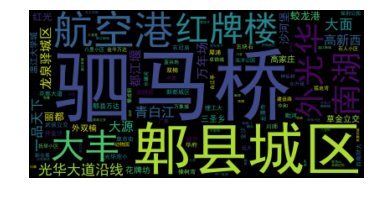

In [22]:
from wordcloud import WordCloud
text = hs_district
result= "/".join(text) #要分割开才行 如果是txt还要用jieba
wordcloud = WordCloud(font_path="c:\windows\Fonts\simhei.ttf").generate(result) 
#这个地方一定要把具体字体也加进去不然就会一直报错真的肝了一百次要命了啊啊啊啊啊
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

**Story 2 **
可以看到驷马桥和郫县是比较火爆的地区。驷马桥是二环内市中心，交通便利位置好。郫县周围有大量学校，也是新区。
除此之外，都江堰，龙泉驿，大丰等城市周边地区也榜上有名。
总体来说，城市核心中的房子和城市郊区的房子出手的比较多。

## 散点图看房价

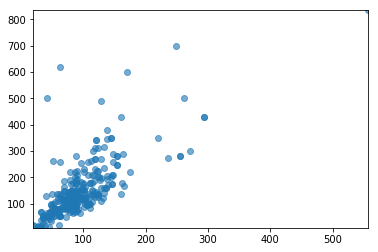

In [13]:
import numpy as np 
import matplotlib.pyplot as plt
x = df.Size 
y = df.TotalPrice 
plt.scatter(x, y, alpha=0.6)
plt.autoscale(tight=True)
plt.show()

基本上是面积越大总价越高，偶尔有些点面积不大总价却超高基本上是商业门市房。
总的来说，这张图没什么太多用途，反映出的结果基本符合人们的常识。

[0, 300, 0, 30000]

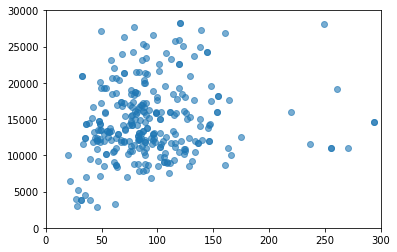

In [14]:
import numpy as np 
import matplotlib.pyplot as plt

#plt.figure(figsize=(10, 10))
x = df.Size 
y = df.UnitPrice 
plt.scatter(x, y, alpha=0.6)
plt.autoscale(tight=True)
#plt.show()
plt.axis([0, 300, 0, 30000])

这两张图看的是面积和单价的关系。我本来的设想是：这个房子的面积越大，它就更有可能是高档住宅/豪宅/商业门市等高价房。而一般经济适用房、单身公寓面积都相对较小。所以应该是面积越大的房子单价越高。
但图上显示的结果并没有如上图“面积-总价”那般的相关性。
总的来说，这张图用处也不大。

In [15]:
from pyecharts import Scatter3D

data = []
data1 = []
for i in range(1,250):
    data1 = [df.UnitPrice[i],df.Size[i],df.TotalPrice[i]]
    data.append(data1)

range_color = [
    '#313695', '#4575b4', '#74add1', '#abd9e9', '#e0f3f8', '#ffffbf',
    '#fee090', '#fdae61', '#f46d43', '#d73027', '#a50026']
scatter3D = Scatter3D("成都二手房交易示意图", width=1200, height=600)
scatter3D.add("", data, is_visualmap=True, visual_range_color=range_color)
scatter3D

## Story 3

 **这张图是看总价和单价、面积之间的关系。
  我们发现，从零坐标开始，点向斜上方发展。符合我们猜想的：“面积和单价的数值越高，总价也就越高”这样的一般观念。
  但是在点的分布中，可以发现： 整体在向单价（x）这一边倾斜。也就是说，虽然它们都和总价正相关，但是单价的高低对总价的高低影响更大一些。
  这个结论也比较合理，因为二手房交易网站上的房源一般都是住宅类型，也就意味着面积的差距不会太大。但是单价之间的差距就会更大一些，所以单价对总房价的影响也就相对大一些。

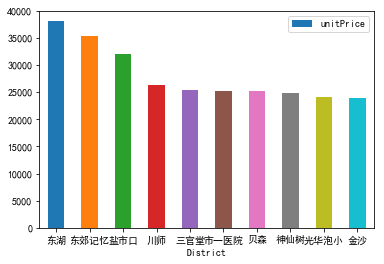

In [16]:
import pandas as pd

import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

df = pd.DataFrame({'District':hs_district,'unitPrice':hs_unitprice})


#fun = {'averagePrice':{'unitPrice':'mean'}}
groupbyDistrict=df.groupby('District')


groupbyD = groupbyDistrict.mean().sort_values('unitPrice', ascending=False).reset_index()
#print(groupbyD)

'''


groupbyD.columns = groupbyD.columns.droplevel(0) 
groupbyClass.rename(columns = {'':'unitPrice'},inplace = True)
'''
ax = groupbyD.head(10).plot.bar(x='District', y='unitPrice', rot=0)


## 地区房价之王
**在这三百条房源中，按照地区分类，看哪一个地区的房价最高。这里是选出的Top10
 以东湖、东郊记忆为首的地区房价相对更高一些。